In [1]:
import pandas as pd 
import matplotlib.pyplot  as plt 
%matplotlib inline 
pd.set_option('display.max_rows', 11251)

# Load the dataset into a pandas dataframe. Name the veriable as "survey".

In [2]:
survey = pd.read_csv("E:\SQL\python\projects\survey\Survey Dataset - Technical Interview.csv", encoding= 'unicode_escape')

In [4]:
survey.dtypes 

ï»¿response_id        int64
collection_date      object
urban_rural          object
education            object
income               object
Vote_Now             object
Past_Vote            object
CM_satisfaction      object
MLA_satisfaction     object
age                  object
gender               object
assembly_no           int64
category             object
weight              float64
dtype: object

In [5]:
survey.ndim

2

In [6]:
survey.T

,0,1,2,3,4,5,6,7,8,9,...,6857,6858,6859,6860,6861,6862,6863,6864,6865,6866
ï»¿response_id,1,2,3,4,5,6,7,8,9,10,...,6858,6859,6860,6861,6862,6863,6864,6865,6866,6867
collection_date,5-24-2017,5-24-2017,5-24-2017,5-24-2017,5-24-2017,5-24-2017,5-24-2017,5-24-2017,5-24-2017,5-24-2017,...,6-1-2017,6-1-2017,6-1-2017,6-1-2017,6-1-2017,6-1-2017,6-1-2017,6-1-2017,6-1-2017,6-1-2017
urban_rural,Rural,Rural,Rural,Urban,Rural,Urban,Urban,Rural,Urban,Urban,...,Rural,Rural,Urban,Rural,Rural,Rural,Rural,Urban,Rural,Rural
education,12th Pass,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Professional Education,12th Pass,12th Pass,...,12th Pass,Graduate,Post - Graduation,Graduate,Graduate,10th Pass,Graduate,Graduate,Professional Education,10th Pass
income,"â¹ 30,000 - â¹ 50,000","â¹ 20,000 - â¹ 30,000","â¹ 5,000 - â¹ 10,000","â¹ 10,000 - â¹ 20,000","â¹ 50,000 - â¹ 80,000","â¹ 20,000 - â¹ 30,000","BPL/Below â¹ 5,000","â¹ 1,50,000 & above","BPL/Below â¹ 5,000","â¹ 20,000 - â¹ 30,000",...,"BPL/Below â¹ 5,000","â¹ 10,000 - â¹ 20,000","â¹ 5,000 - â¹ 10,000","BPL/Below â¹ 5,000","BPL/Below â¹ 5,000","BPL/Below â¹ 5,000","BPL/Below â¹ 5,000","â¹ 5,000 - â¹ 10,000","â¹ 10,000 - â¹ 20,000","â¹ 5,000 - â¹ 10,000"
Vote_Now,BJP,RLSP,JAP(L),RJD,JD(U),Others,RJD,BJP,BJP,RJD,...,RJJP,RJD,Left Front,RJD,BJP,JD(U),RJD,JAP(L),BJP,JAP(L)
Past_Vote,BJP,JD(U),BJP,RJD,Did not vote,BJP,BJP,JD(U),BJP,RJD,...,BJP,RJD,Did not vote,RJD,BJP,BJP,RJD,RJD,Did not vote,JAP(L)
CM_satisfaction,Fully Dissatisfied,Somewhat Satisfied,Fully Dissatisfied,Fully Dissatisfied,Fully Satisfied,Somewhat Satisfied,Fully Dissatisfied,Somewhat Dissatisfied,Fully Satisfied,Fully Dissatisfied,...,Fully Dissatisfied,Fully Dissatisfied,Fully Dissatisfied,Fully Dissatisfied,Fully Dissatisfied,Fully Satisfied,Fully Dissatisfied,Canât say,Fully Satisfied,Fully Satisfied
MLA_satisfaction,Fully Dissatisfied,Fully Dissatisfied,Somewhat Satisfied,Somewhat Satisfied,Fully Satisfied,Fully Dissatisfied,Fully Dissatisfied,Somewhat Dissatisfied,Fully Dissatisfied,Fully Dissatisfied,...,Fully Dissatisfied,Fully Satisfied,Somewhat Satisfied,Fully Satisfied,Somewhat Satisfied,Fully Dissatisfied,Fully Dissatisfied,Fully Dissatisfied,Somewhat Satisfied,Fully Satisfied
age,26,34,25,36,22,38,34,34,23,26,...,22,24,21,25,22,25,30,20,23,33


# How many samples were collected on each day ?

In [7]:
survey.collection_date.unique()

array(['5-24-2017', '5-25-2017', '5-26-2017', '5-27-2017', '5-28-2017',
       '5-29-2017', '5-30-2017', '5-31-2017', '6-1-2017'], dtype=object)

In [8]:
survey.collection_date.nunique()

9

In [9]:
survey.collection_date.value_counts(ascending = True)

5-31-2017     557
5-30-2017     582
5-26-2017     598
6-1-2017      607
5-29-2017     620
5-27-2017     665
5-28-2017     761
5-25-2017     998
5-24-2017    1479
Name: collection_date, dtype: int64

In [111]:
survey.groupby('collection_date').collection_date.nunique() #number of unique value 

collection_date
5-24-2017    1
5-25-2017    1
5-26-2017    1
5-27-2017    1
5-28-2017    1
5-29-2017    1
5-30-2017    1
5-31-2017    1
6-1-2017     1
Name: collection_date, dtype: int64

# What is proportion of the total respondents were aged less then 45?

In [11]:
survey.head(2)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [13]:
survey['age'].replace({'24ko':24}, inplace =True)

In [14]:
survey.age.unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', 24, '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [15]:
survey['age'] = survey.age.astype(int)

In [16]:
survey.age.dtype

dtype('int32')

In [123]:
survey[survey['age'] < 45].shape

(6399, 14)

In [18]:
6399/6867 *100

93.18479685452162

### Create a new column in the dataframe "age_group". this column should contain the age group the respondent belongs to . The age groups are 18-25,25-40,40-55 and 55+. The dataframe should look like this after the column creation: 
    !![image-2.png](attachment:image-2.png)

In [20]:
data =survey.copy()

In [21]:
data.head(2)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [22]:
#data.insert(new_column_position(0,1,2,3...),"new_column_name",'new_coulumn value')

data.insert(10,"age_group",survey.age)

In [23]:
data.head(2)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419


In [24]:
data1 = data[(data.age_group >= 18) & (data.age_group < 25)]

In [25]:
data1.head(2)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below â¹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,23,Male,181,Gen,0.226477


In [26]:
data1.age_group.unique()

array([22, 23, 24, 19, 21, 18, 20])

In [27]:
data1['age_group'] = '18-25'

C:\Users\kshis\AppData\Local\Temp\ipykernel_24216\2139180286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['age_group'] = '18-25'


In [28]:
data1.head(1)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505


In [29]:
data2 = data[(data.age_group >= 25) & (data.age_group < 40)]

In [30]:
data2['age_group'] = '25-40'

C:\Users\kshis\AppData\Local\Temp\ipykernel_24216\1359659790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['age_group'] = '25-40'


In [31]:
data3 = data[(data.age_group >= 40) & (data.age_group < 55)]
data3['age_group'] = '40-55'

C:\Users\kshis\AppData\Local\Temp\ipykernel_24216\157134844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['age_group'] = '40-55'


In [32]:
data4 = data[(data.age_group >= 55)]
data4['age_group'] = '55+'

C:\Users\kshis\AppData\Local\Temp\ipykernel_24216\1158261819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['age_group'] = '55+'


In [124]:
data = pd.concat([data1,data2,data3,data4])
pd.concat([data])
data.shape

(6867, 15)

In [34]:
data.tail(4)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
6702,6703,5-31-2017,Urban,Professional Education,"â¹ 10,000 - â¹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519
6720,6721,5-31-2017,Rural,Graduate,"â¹ 10,000 - â¹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906
6787,6788,6-1-2017,Rural,10th Pass,"â¹ 20,000 - â¹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094
6851,6852,6-1-2017,Urban,Graduate,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,66,55+,Male,165,Gen,0.300990


In [35]:
data.age_group.unique()

array(['18-25', '25-40', '40-55', '55+'], dtype=object)

### How many samples were collected for each age group ? Which age found had the most samples ?

In [36]:
data.age_group.value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

### What proporttion of the respondents had opted for the RJD party in both the Vote_Now and the Past_vote questions?

In [37]:
data.head(3)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below â¹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,5-24-2017,Rural,Graduate,"â¹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477


In [38]:
survey.Vote_Now.unique()

array(['BJP', 'RLSP', 'JAP(L)', 'RJD', 'JD(U)', 'Others', 'LJP',
       'Undecided', 'NOTA', 'Plurals', 'INC', 'RJJP', 'BSP', 'AAP',
       'Left Front', 'AIMIM', 'HAM', 'VIP'], dtype=object)

In [39]:
survey.Past_Vote.unique()

array(['BJP', 'JD(U)', 'RJD', 'Did not vote', 'LJP', 'NOTA', 'INC', 'VIP',
       'Others', 'Left Front', 'RLSP', 'HAM', 'BSP', 'JAP(L)'],
      dtype=object)

In [40]:
survey[survey['Vote_Now'] == 'RJD']

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
3,4,5-24-2017,Urban,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
6,7,5-24-2017,Urban,Graduate,"BPL/Below â¹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283
9,10,5-24-2017,Urban,12th Pass,"â¹ 20,000 - â¹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below â¹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,Male,194,BC,0.769738
19,20,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,37,Male,200,BC,0.936383
21,22,5-24-2017,Rural,Graduate,"â¹ 5,000 - â¹ 10,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,29,Male,210,BC,0.713059
25,26,5-24-2017,Urban,Post - Graduation,"BPL/Below â¹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,39,Male,181,SC,2.551174
27,28,5-24-2017,Rural,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,BJP,Fully Dissatisfied,Fully Satisfied,25,Male,179,Gen,0.247091
34,35,5-24-2017,Rural,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,Did not vote,Fully Dissatisfied,Fully Dissatisfied,25,Male,188,EBC,0.967578
37,38,5-24-2017,Rural,Graduate,"â¹ 1,50,000 & above",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,203,BC,0.713059


In [41]:
survey[survey['Past_Vote'] == 'RJD']

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
3,4,5-24-2017,Urban,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
9,10,5-24-2017,Urban,12th Pass,"â¹ 20,000 - â¹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below â¹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,Male,194,BC,0.769738
19,20,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,37,Male,200,BC,0.936383
21,22,5-24-2017,Rural,Graduate,"â¹ 5,000 - â¹ 10,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,29,Male,210,BC,0.713059
37,38,5-24-2017,Rural,Graduate,"â¹ 1,50,000 & above",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,203,BC,0.713059
38,39,5-24-2017,Urban,Graduate,"BPL/Below â¹ 5,000",RJD,RJD,Canât say,Canât say,22,Male,181,SC,1.596987
39,40,5-24-2017,Rural,Graduate,"BPL/Below â¹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,32,Male,194,BC,4.234598
47,48,5-24-2017,Urban,Graduate,"BPL/Below â¹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,20,Male,172,BC,1.188838
85,86,5-24-2017,Rural,12th Pass,"BPL/Below â¹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,22,Male,187,BC,0.586158


In [42]:
survey[(survey['Vote_Now'] == 'RJD') & (survey['Past_Vote'] == 'RJD')].shape

(811, 14)

In [43]:
811/6867 * 100

11.810106305519149

#### For each day of sample collection , determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our awnser for that day would be 0.3 

In [44]:
survey.head(3)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"â¹ 5,000 - â¹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762


In [45]:
CM= survey[survey.CM_satisfaction == 'Fully Satisfied']

In [46]:
CM.shape

(721, 14)

In [47]:
a= CM.collection_date.value_counts()
print(a)

5-24-2017    146
5-25-2017     95
5-28-2017     92
6-1-2017      75
5-29-2017     73
5-30-2017     65
5-31-2017     62
5-26-2017     59
5-27-2017     54
Name: collection_date, dtype: int64


In [48]:
b = survey.collection_date.value_counts()
print(b)

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64


In [49]:
a/b * 100 

5-24-2017     9.871535
5-25-2017     9.519038
5-26-2017     9.866221
5-27-2017     8.120301
5-28-2017    12.089356
5-29-2017    11.774194
5-30-2017    11.168385
5-31-2017    11.131059
6-1-2017     12.355848
Name: collection_date, dtype: float64

#### In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [50]:
data.head(2)

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below â¹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477


In [51]:
data['MLA_satisfaction'].unique()

array(['Fully Satisfied', 'Fully Dissatisfied', 'Somewhat Satisfied',
       'Canâ\x80\x99t say', 'Somewhat Dissatisfied'], dtype=object)

In [53]:
MLA =data[data['MLA_satisfaction'] == 'Fully Dissatisfied']

In [55]:
c = MLA.collection_date.value_counts()
print(c)

5-24-2017    887
5-25-2017    630
5-28-2017    462
5-27-2017    403
6-1-2017     385
5-30-2017    361
5-26-2017    353
5-29-2017    350
5-31-2017    321
Name: collection_date, dtype: int64


In [56]:
d = survey.collection_date.value_counts()
print(d)

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64


In [58]:
e =c/d * 100
print(e)

5-24-2017    59.972955
5-25-2017    63.126253
5-26-2017    59.030100
5-27-2017    60.601504
5-28-2017    60.709593
5-29-2017    56.451613
5-30-2017    62.027491
5-31-2017    57.630162
6-1-2017     63.426689
Name: collection_date, dtype: float64


In [70]:
type(e)

pandas.core.series.Series

In [81]:
g = pd.DataFrame(e)
g

,collection_date
5-24-2017,59.972955
5-25-2017,63.126253
5-26-2017,59.030100
5-27-2017,60.601504
5-28-2017,60.709593
5-29-2017,56.451613
5-30-2017,62.027491
5-31-2017,57.630162
6-1-2017,63.426689


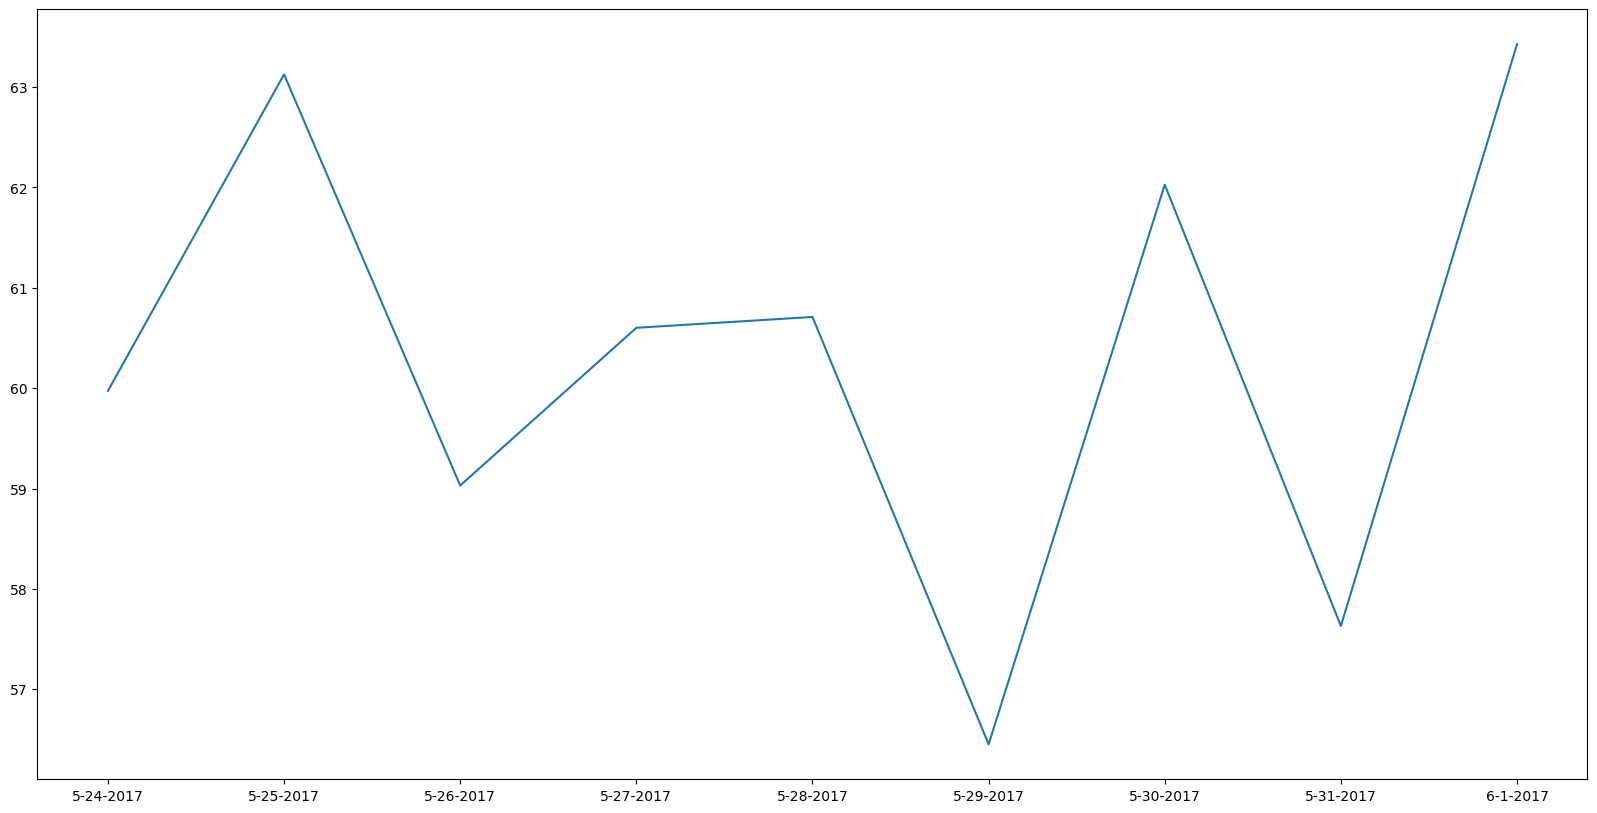

In [88]:
g.collection_date.plot(kind = 'line', figsize=(20,10));

### Create a pivot-table with index as Past_Vote, Column as Vote_Now and cell values as the count of sample 

In [90]:
survey.pivot_table(index ='Past_Vote', columns ='Vote_Now',aggfunc ='count')

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1630.0  3.0  5.0  42.0  101.0  110.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  22.0   41.0   69.0   
HAM                      2.0   NaN    25.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  57.0   10.0    9.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   254.0  2.0  2.0  45.0   72.0  279.0   
LJP                      NaN   NaN    76.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    45.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    46.0  NaN  1.0  31.0   31.0   39.0   
RLSP                     NaN   NaN    17.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                               ... ï»¿response_id                           \
Vote_Now       LJP Left Front  ...            LJP Left Front   NOTA Others   
Past_Vote                      ...                                           
BJP           44.0       13.0  ...           44.0       13.0  194.0   32.0   
BSP            NaN        NaN  ...            NaN        NaN    NaN    NaN   
Did not vote  10.0       16.0  ...           10.0       16.0   83.0   11.0   
HAM            2.0        NaN  ...            2.0        NaN    4.0    NaN   
INC            NaN        3.0  ...            NaN        3.0    6.0    3.0   
JAP(L)         NaN        NaN  ...            NaN        NaN    NaN    1.0   
JD(U)         29.0        9.0  ...           29.0        9.0   90.0   18.0   
LJP            9.0        2.0  ...            9.0        2.0    3.0    NaN   
Left Front     NaN       18.0  ...            NaN       18.0    1.0    1.0   
NOTA           3.0        5.0  ...            3.0        5.0   46.0    7.0   
Others         1.0        4.0  ...            1.0        4.0   10.0    6.0   
RJD            4.0        9.0  ...            4.0        9.0   18.0    8.0   
RLSP           NaN        NaN  ...            NaN        NaN    3.0    NaN   
VIP            NaN        NaN  ...            NaN        NaN    NaN    NaN   

                                                         
Vote_Now     Plurals    RJD  RJJP  RLSP Undecided   VIP  
Past_Vote                                                
BJP             87.0  370.0  88.0  24.0      62.0  10.0  
BSP              NaN    NaN   NaN   NaN       NaN   NaN  
Did not vote    51.0  195.0  20.0   3.0      31.0   5.0  
HAM              NaN    6.0   4.0   NaN       1.0   NaN  
INC              3.0  100.0   1.0   2.0       7.0   NaN  
JAP(L)           NaN    2.0   NaN   NaN       NaN   NaN  
JD(U)           43.0  435.0  13.0  25.0      36.0   6.0  
LJP              2.0   17.0   1.0   NaN       1.0   NaN  
Left Front       NaN    4.0   NaN   1.0       NaN   1.0  
NOTA            11.0   27.0   5.0   4.0       5.0   NaN  
Others           8.0   21.0   7.0   1.0       6.0   NaN  
RJD             10.0  811.0   1.0  10.0      14.0   4.0  
RLSP             2.0    8.0   2.0  12.0       1.0   1.0  
VIP              NaN    NaN   NaN   NaN       NaN   1.0  

[14 rows x 216 columns]

### Repeat the above question with the cell values as the sum of "weight".

In [94]:
survey.pivot_table(index ='Past_Vote', columns ='Vote_Now',values ='weight', aggfunc ='sum')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806262,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


### Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group

In [112]:
df1 = data.groupby('age_group').count()

In [113]:
df1

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
40-55,801,801,801,801,801,801,801,801,801,801,801,801,801,801
55+,128,128,128,128,128,128,128,128,128,128,128,128,128,128


In [102]:
type(df1)

pandas.core.frame.DataFrame

### Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group thet opted for the JD(U) party in Vote_Now.

In [120]:
df2 = data[data['Vote_Now'] == 'JD(U)'].groupby('age_group').count()
df2

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,181,181,181,181,181,181,181,181,181,181,181,181,181,181
25-40,264,264,264,264,264,264,264,264,264,264,264,264,264,264
40-55,68,68,68,68,68,68,68,68,68,68,68,68,68,68
55+,13,13,13,13,13,13,13,13,13,13,13,13,13,13


### To merge two different df using above two questions!

In [122]:
pd.merge(df1,df2 , on ='age_group')

,ï»¿response_id_x,collection_date_x,urban_rural_x,education_x,income_x,Vote_Now_x,Past_Vote_x,CM_satisfaction_x,MLA_satisfaction_x,age_x,...,income_y,Vote_Now_y,Past_Vote_y,CM_satisfaction_y,MLA_satisfaction_y,age_y,gender_y,assembly_no_y,category_y,weight_y
age_group,,,,,,,,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,181,181,181,181,181,181,181,181,181,181
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,...,264,264,264,264,264,264,264,264,264,264
40-55,801,801,801,801,801,801,801,801,801,801,...,68,68,68,68,68,68,68,68,68,68
55+,128,128,128,128,128,128,128,128,128,128,...,13,13,13,13,13,13,13,13,13,13
